<a href="https://colab.research.google.com/github/nivethsaran/PythonForDataScience/blob/master/TensorFlow_in_Practice_Specialization_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tensorflow in Practice Specialization Complete Notes

## Libraries

In [0]:
!pip install tensorflow==2.0.0-alpha0

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

##Course 1

###Course1 Week1

In [0]:
xs = np.array([1.0,2.0,3.0,4.0,5.0,6.0],dtype=float)
ys=np.array([2.0,4.0,6.0,8.0,10.0,12.0],dtype=float)


In [0]:
model=keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')

In [0]:
model.fit(xs,ys,epochs=500)

In [0]:
model.predict([13.0])

###Course1 Week 2

In [0]:
mnist=tf.keras.datasets.fashion_mnist

In [0]:
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

In [0]:
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [0]:
training_images=training_images/255.0
test_images=test_images/255.0

In [0]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras. layers.Dense(10,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy')

model.fit(training_images,training_labels, epochs=5)

In [0]:
model.evaluate(test_images,test_labels)

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

### Course 1 Week 3

In [0]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

### Course 1 Week 4

Refer  my github gists
Specific Link for Week 4 content: 

https://gist.github.com/nivethsaran/a0941b0156d1f61ac4c8c064d7085d72

-----------------------------------------------------------------------

Refer my github gists 

https://gist.github.com/nivethsaran/428e56e102f8afc19e025902fe36edad  

This is the same thing as above except it includes Validation stuff

--------------------------------------------------------------------------------

https://gist.github.com/nivethsaran/030c36a2d6e39045d31c022c0bc8adf6 

Refer this link to play around when images are compressed and trained in the same neural network

--------------------------------------------------------------------------------

##Course 2

### Course 2 Week 1

Go to the below url for the gist cats vs dogs.
 https://gist.github.com/nivethsaran/2a89184222f87b0f82a4f154dd4aa8dc

### Course 2 Week 2


Go to the below url for the gist cats vs dogs with augmentation

https://gist.github.com/nivethsaran/57c8aafae29f2102ee30fcbcdd1c9120


###Course 2 Week 3 Transfer Learning

Resource: https://gist.github.com/nivethsaran/0f89c6e63b30eb940ddd8af8e076642c

###Course 2 Week 4 Multiclass Classification

Rock Paper Scissors Multiclass classification
https://gist.github.com/nivethsaran/881011b3a888b1e90f94d04009682afe

##Course 3

### Course 3 Week 1

In [0]:
#Get the dataset and store in the /tmp folder of colab

!wget  --no-check-certificate \
        https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
        -O /tmp/sarcasm.json

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences=['I love my dog','I love my cat','You love my dog!','Do  you think my dog is amazing?']

tokenizer=Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(sentences)
padded =pad_sequences(sequences,padding='post')
print(word_index)

print(sequences)

print(padded)

print(padded.shape)

In [0]:
import json

with open('/tmp/sarcasm.json','r') as f:
  datastore=json.load(f)

sentences=[]
labels=[]
urls=[]

print(datastore[0])

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(oov_token="<OOV>")

tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(sentences)
padded =pad_sequences(sequences,padding='post')
print(word_index)

print(sequences)

print(padded)

print(padded.shape)


###Course 3 Week 2 Word Embeddings

#### IMDB Review Exercise

Gist for reference: https://gist.github.com/nivethsaran/12300eaa5d698cc032c44ee43cff39ed

In [0]:
#Load Dataset from tfds
imdb,info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)



In [0]:
train_data,test_data=imdb['train'],imdb['test']

training_sentences=[]
training_labels=[]

testing_sentences=[]
testing_labels=[]

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())


training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [0]:
num_epochs = 10
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

#### Sarcasm with tokenizer 

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)


sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

### Course 3 Week 3 Sequence Models

IMDB Subwords 8K with Single Layer LSTM
https://gist.github.com/nivethsaran/409c43b0ded51eaed2df32807782ed12


IMDB Subwords 8K with Multi Layer LSTM
https://gist.github.com/nivethsaran/4e82d1a3b2fed15b9b400c308c0a8b03


IMDB Subwords 8K with 1D Convolutional Layer
https://gist.github.com/nivethsaran/3ab4ca4b05853b1f75f614529a76eebc


Sarcasm with Bidirectional LSTM
https://gist.github.com/nivethsaran/13c8100dc63d8d051dbf3cb921c15124


Sarcasm with 1D Convolutional Layer
https://gist.github.com/nivethsaran/ade8b8c8f41d3b2bdb305305ed629b5b


IMDB Reviews with GRU (and optional LSTM and Conv1D)
https://gist.github.com/nivethsaran/61a763105fabc3fdade59434d0bc985b

### Course 3 Week 4 Sequence Models and Literature

In [0]:
#Lyrics Dataset
!wget  --no-check-certificate \
        https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
        -O /tmp/irish-lyrics-eof.txt

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Embedding,Dense,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential


In [0]:
f=open('/tmp/irish-lyrics-eof.txt','r')
data=""
for line in f:
  data+=line

In [0]:
tokenizer=Tokenizer()

corpus=data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
total_words =len(tokenizer.word_index)+1

print(tokenizer.word_index)
print(total_words)

In [0]:
input_sequeneces=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequence=token_list[:i+1]
    input_sequeneces.append(n_gram_sequence)
    print(token_list[:i+1])

In [0]:
max_sequence_len=max(len(x) for x in input_sequeneces)

input_sequeneces=np.array(pad_sequences(input_sequeneces,maxlen=max_sequence_len,padding='pre'))

xs,labels=input_sequeneces[:,:-1],input_sequeneces[:,-1]

ys= tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [0]:
print(tokenizer.word_index['in'])

print(xs[6])

print(ys[6])

In [0]:
model=Sequential()
model.add(Embedding(total_words,64,input_length=max_sequence_len))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()
history=model.fit(xs,ys,epochs=100,verbose=1)



In [0]:
seed_text="Lawrence went to dublin"
next_words=50
for i in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
  predicted=model.predict_classes(token_list,verbose=0)
  output_word=0
  for word,index in tokenizer.word_index.items():
    output_word=word
    break
  seed_text+=" "+output_word
print(seed_text)

Challenge: https://www.tensorflow.org/tutorials/text/text_generation

##Course 4

### Course 4 Week 1 Time Series Intro

https://gist.github.com/nivethsaran/978f250dcd50ce65edfa2b69f9fb90a4

--------------------------------------------------------------------------------
https://gist.github.com/nivethsaran/48dfa1e71e7862af3393b50bb1ad9dc2

### Course 4 Week 2 Time Series Implementation

Refernce:

https://gist.github.com/nivethsaran/48dfa1e71e7862af3393b50bb1ad9dc2


--------------------------------------------------------------------------------

Below is the beggining of preparing sample data to train

In [0]:
dataset= tf.data.Dataset.range(10)
for val in dataset:
  print(val.numpy())

In [0]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5,shift=1)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(),end=" ")
  print()

In [0]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5,shift=1,drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(),end=" ")
  print()

In [0]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5,shift=1,drop_remainder=True)
dataset= dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
  print(window.numpy())

In [0]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5,shift=1,drop_remainder=True)
dataset= dataset.flat_map(lambda window: window.batch(5))
dataset=dataset.map(lambda window:(window[:-1],window[-1:]))
for x,y in dataset:
  print(x.numpy(),y.numpy())

In [0]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5,shift=1,drop_remainder=True)
dataset= dataset.flat_map(lambda window: window.batch(5))
dataset=dataset.map(lambda window:(window[:-1],window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x,y in dataset:
  print(x.numpy(),y.numpy())

In [0]:
dataset= tf.data.Dataset.range(10)
dataset= dataset.window(5,shift=1,drop_remainder=True)
dataset= dataset.flat_map(lambda window: window.batch(5))
dataset=dataset.map(lambda window:(window[:-1],window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print(x.numpy(),y.numpy())

End of preparing sample

After creating sample data as show above, refer the given gists to train a simple model

https://gist.github.com/nivethsaran/4d0dd77226331d3356674e7038ac0715

--------------------------------------------------------------------------------

https://gist.github.com/nivethsaran/6a380f83c3bd15e14fd71364a93c3f80

--------------------------------------------------------------------------------

https://gist.github.com/nivethsaran/36f96e25e2c1fb0bee8556fe135e6491

--------------------------------------------------------------------------------


###Course 4 Week 3 RNN for Time Series

RNN Code:

https://gist.github.com/nivethsaran/e24d4024abc2066a7af6d3ea82edbb78

LSTM Code:

https://gist.github.com/nivethsaran/e1c334174dc138384292f8c34445dc33

### Course 4 Week 4 Real World Data

https://gist.github.com/nivethsaran/ad5990ae35c5b30bf8f3bb5d61662026

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
!wget  --no-check-certificate \
        https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
        -O /tmp/Sunspots.csv

In [0]:
import csv
time_step = []
sunspots = []

with open('/tmp/Sunspots.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

#### Sunspots Notebook Purely DNN

For Reference:

https://gist.github.com/nivethsaran/e5cb3b5fbb5ba23429aa44df5a25cf08 


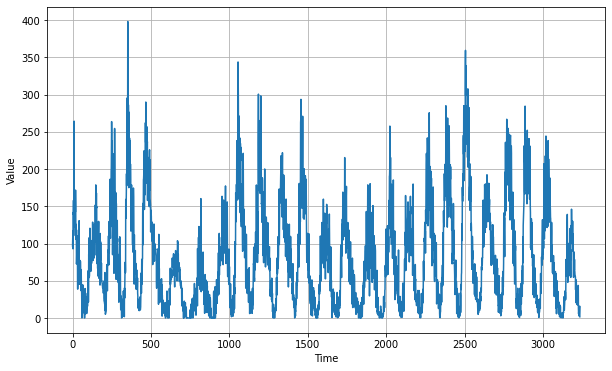

In [10]:
series = np.array(sunspots)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [0]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [14]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(3000,)
Epoch 1/100
12/12 [==============================] - 3s 291ms/step - loss: 79.8340 - mae: 80.3314 - lr: 1.0000e-08
Epoch 2/100
12/12 [==============================] - 3s 284ms/step - loss: 78.0944 - mae: 78.5918 - lr: 1.1220e-08
Epoch 3/100
12/12 [==============================] - 3s 284ms/step - loss: 75.4519 - mae: 75.9497 - lr: 1.2589e-08
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 72.2679 - mae: 72.7658 - lr: 1.4125e-08
Epoch 5/100
12/12 [==============================] - 3s 284ms/step - loss: 68.7693 - mae: 69.2672 - lr: 1.5849e-08
Epoch 6/100
12/12 [==============================] - 3s 281ms/step - loss: 65.1128 - mae: 65.6099 - lr: 1.7783e-08
Epoch 7/100
12/12 [==============================] - 3s 285ms/step - loss: 61.5272 - mae: 62.0241 - lr: 1.9953e-08
Epoch 8/100
12/12 [==============================] - 3s 283ms/step - loss: 58.1406 - mae: 58.

(1e-08, 0.0001, 0.0, 60.0)

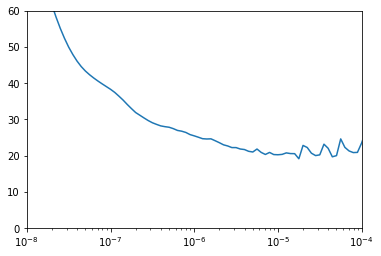

In [16]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [17]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

30/30 [==============================] - 4s 117ms/step - loss: 38.9180 - mae: 39.4144
Epoch 2/500
30/30 [==============================] - 4s 117ms/step - loss: 25.7652 - mae: 26.2597
Epoch 3/500
30/30 [==============================] - 4s 117ms/step - loss: 22.0764 - mae: 22.5701
Epoch 4/500
30/30 [==============================] - 4s 118ms/step - loss: 20.4601 - mae: 20.9529
Epoch 5/500
30/30 [==============================] - 4s 118ms/step - loss: 19.7085 - mae: 20.2010
Epoch 6/500
30/30 [==============================] - 4s 118ms/step - loss: 19.3149 - mae: 19.8069
Epoch 7/500
30/30 [==============================] - 4s 117ms/step - loss: 18.7104 - mae: 19.2024
Epoch 8/500
30/30 [==============================] - 4s 118ms/step - loss: 18.1212 - mae: 18.6128
Epoch 9/500
30/30 [==============================] - 4s 119ms/step - loss: 18.0739 - mae: 18.5654
Epoch 10/500
30/30 [==============================] - 4s 117ms/step - loss: 17.9504 - mae: 18.4419
Epoch 11/500
30/30 [===========

In [0]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()



zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [0]:
print(rnn_forecast)

#### Sunspots Notebook 

For Reference: 

https://gist.github.com/nivethsaran/37c3493b34fc8cf507cf2ab54ad51824

In [0]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)


In [0]:
forecast=[]
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()